In [2]:
import numpy as np
import matplotlib 
import matplotlib as mpl

import halophot
from halophot.halo_tools import halo_tpf

import lightkurve as lk

import k2sc 

from astropy.table import Table
from astropy.io import fits

%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(10.0,10.0)    #(6.0,4.0)
matplotlib.rcParams['font.size']=16              #10 
matplotlib.rcParams['savefig.dpi']= 300             #72 
colours = mpl.rcParams['axes.prop_cycle'].by_key()['color']
from mpl_toolkits.axes_grid1 import make_axes_locatable

print(lk.__version__)
print(k2sc.__version__)
print(halophot.__version__)

Populating the interactive namespace from numpy and matplotlib
2.0.11
1.0.2.1
0.7.4.6


In [3]:
name = "EPIC 200173843" #aldebaran
search_result = lk.search_targetpixelfile(name, author="K2", cadence="long")

In [4]:
tpf = search_result[0].download()

In [5]:
fname = tpf.path

<AxesSubplot:title={'center':'Target ID: 200173843, Cadence: 140879'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

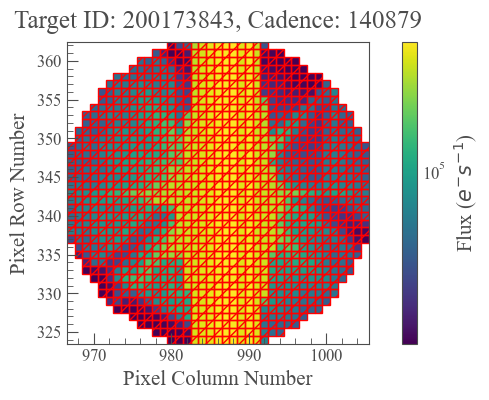

In [6]:
tpf = halo_tpf(fname)
tpf.plot(frame=1,aperture_mask=tpf.pipeline_mask, scale = 'log')

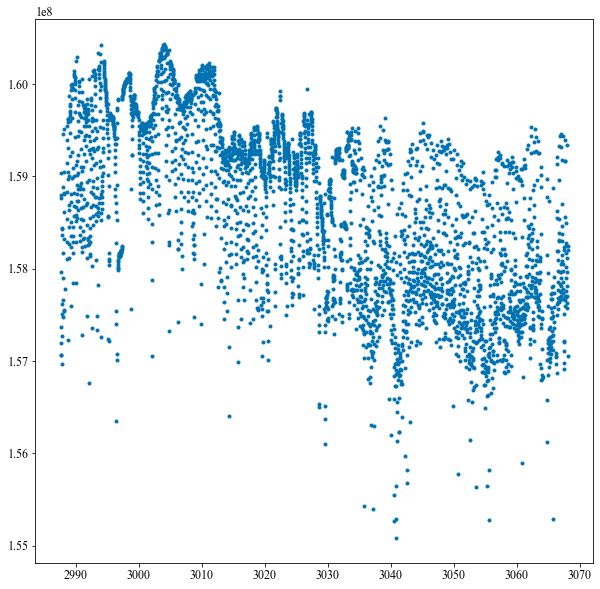

In [7]:
lc = tpf.to_lightcurve()
plt.plot(lc.time.value, lc.flux,'.')

In [8]:
%%time
meta, corr_lc = tpf.halo(split_times=[3010],thresh=0.5,lag=10,aperture_mask=tpf.pipeline_mask);
weightmap = meta['weightmap'][0]

Taking cadences from beginning to 1027
497 saturated pixels
Throwing out 2 bad cadences
Censored TPF
Subsampling by a factor of 1
Calculating weights
Using Analytic Derivatives
Calculated weights!
Taking cadences from 1027 to end
493 saturated pixels
Throwing out 1 bad cadences
Censored TPF
Subsampling by a factor of 1
Calculating weights
Using Analytic Derivatives
Calculated weights!
CPU times: user 15.2 s, sys: 3.99 s, total: 19.2 s
Wall time: 2.91 s


/Users/research/.local/lib/python3.8/site-packages/halophot/halo_tools.py:1156: UserWarning: Lightkurve doesn't allow columns or meta values to be created via a new attribute name.A new attribute is created. It will not be carried over when the object is copied. - see https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.html
  lc_out.pos_corr1 = self.pos_corr1
/Users/research/.local/lib/python3.8/site-packages/halophot/halo_tools.py:1157: UserWarning: Lightkurve doesn't allow columns or meta values to be created via a new attribute name.A new attribute is created. It will not be carried over when the object is copied. - see https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.html
  lc_out.pos_corr2 = self.pos_corr2
/Users/research/.local/lib/python3.8/site-packages/halophot/halo_tools.py:1158: UserWarning: Lightkurve doesn't allow columns or meta values to be created via a new attribute name.A new attribute is created. It will not be carried over when the object 

/var/folders/q2/9w1c_jb920sf2pyq5t8xc9sw0000gp/T/ipykernel_62994/794867533.py:11: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("seismic").copy()
  cmap.set_bad('k',1.)


Text(0.5, 1.0, 'TV-min Weightmap')

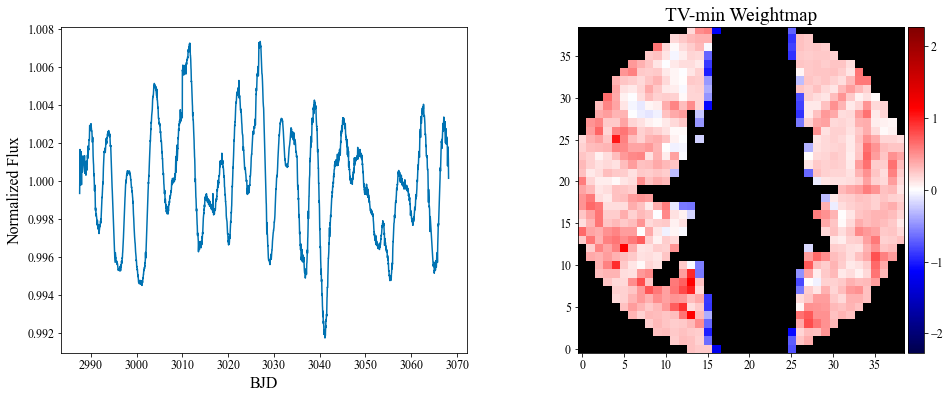

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16.0,6.0))

ax1.plot(corr_lc.time.value,corr_lc.flux)
ax1.set_ylabel('Normalized Flux')
ax1.set_xlabel('BJD')
ax2.set_title('Light Curve')

cmap = mpl.cm.seismic
norm = np.size(weightmap)

cmap.set_bad('k',1.)
im = np.log10(weightmap.T*norm)
im2 = ax2.imshow(im,cmap=cmap, vmin=-2*np.nanmax(im),vmax=2*np.nanmax(im),
    interpolation='None',origin='lower')
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical');

ax2.set_title('TV-min Weightmap')

In [10]:
import k2sc
from k2sc.standalone import k2sc_lc

corr_lc.__class__ = k2sc_lc

In [ ]:
corr_lc.k2sc()

/Users/research/.local/lib/python3.8/site-packages/k2sc/standalone.py:293: LightkurveDeprecationWarning: The hdu function is deprecated and may be removed in a future version.
        Use fits.open(lc.filename) instead.
  primary_header = self.hdu[0].header
/Users/research/.local/lib/python3.8/site-packages/k2sc/dtdata.py:63: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bstarts = np.full(nblocks, -bspan, np.int)   ## Starting indices for blocks
/Users/research/.local/lib/python3.8/site-packages/k2sc/dtdata.py:17: DeprecationWarning: `np.bool` is

Using default splits [2998, 3033] for campaign 13


/Users/research/.local/lib/python3.8/site-packages/k2sc/gp.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = zeros((t1.size,t2.size), np.bool)


Starting initial outlier detection
  Flagged 3 ( 0.1%) outliers.
Starting Lomb-Scargle period search
  Using SqrExp position kernel
  Found periodicity p =    5.75 (fap 9.0849e-191 < 1e-50), will use a quasiperiodic kernel
Starting global hyperparameter optimisation using DE


  0%|                                                   | 0/150 [00:00<?, ?it/s]/Users/research/.local/lib/python3.8/site-packages/k2sc/de.py:85: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t = np.zeros(3, np.int)
 65%|████████████████▉         | 98/150 [04:00<02:13,  2.56s/it, -ln(L)=-5520.6]

Text(0.5, 1.01, '15 Ori')

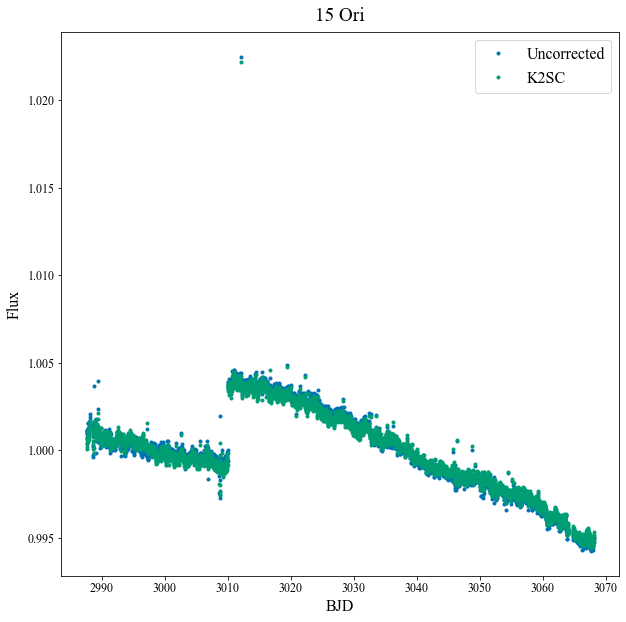

In [111]:
plt.plot(corr_lc.time.value,corr_lc.flux.value,'.',label="Uncorrected")
plt.plot(corr_lc.time.value,corr_lc.corr_flux.value,'.',label="K2SC")
plt.legend()
plt.xlabel('BJD')
plt.ylabel('Flux')
plt.title('15 Ori',y=1.01)